In [1]:
from helpers import parse_gpx, identify_features, calculate_abilities, plot_elevation_chart, plot_elevation_chart_with_features
import pandas as pd
import numpy as np
import folium

In [2]:
import re

#string from flammerouge
input_string = """
1. Huisepontweg (+, 1700 m, Km 110.8), 2. Oude Kwaremont (+, 2300 m, Km 137.0), 3. Eikenberg (+, 1200 m, Km 155.2), 4. Holleweg (+, 700 m, Km 157.3), 5. Kerkgate (+, 1400 m, Km 164.3), 6. Jagerij (+, 800 m, Km 166.7), 7. Molenberg (+, 300 m, Km 171.6), 8. Berg Ten Houte (+, 400 m, Km 197.1), 9. Oude Kwaremont (+, 2300 m, Km 219.2), 10. Paterberg (+, 400 m, Km 222.6), 11. Koppenberg (+, 600 m, Km 229.2), 12. Mariaborrestraat (+, 2000 m, Km 235.3), 13. Taaienberg (+, 500 m, Km 237.0), 14. Oude Kruisberg (+, 500 m, Km 245.5), 15. Oude Kwaremont (+, 1500 m, Km 257.0), 16. Paterberg (+, 400 m, Km 260.5).
"""

pattern = re.compile(r'(?P<seq>\d+)\.\s*(?P<name>[^,]+)\s*\(\+\s*,\s*(?P<length>\d+)\s*m,\s*Km\s*(?P<end_km>\d+\.\d+)\)')

matches = pattern.finditer(input_string)
cobble_sections = [
    {
        "seq": int(match.group("seq")),
        "name": match.group("name").strip(),
        "length": int(match.group("length")),
        "start_km": float(match.group("end_km"))*1000 - float(match.group("length")),
        "end_km": float(match.group("end_km"))*1000
    }
    for match in matches
]

cobble_sections


[{'seq': 1,
  'name': 'Huisepontweg',
  'length': 1700,
  'start_km': 109100.0,
  'end_km': 110800.0},
 {'seq': 2,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 134700.0,
  'end_km': 137000.0},
 {'seq': 3,
  'name': 'Eikenberg',
  'length': 1200,
  'start_km': 154000.0,
  'end_km': 155200.0},
 {'seq': 4,
  'name': 'Holleweg',
  'length': 700,
  'start_km': 156600.0,
  'end_km': 157300.0},
 {'seq': 5,
  'name': 'Kerkgate',
  'length': 1400,
  'start_km': 162900.0,
  'end_km': 164300.0},
 {'seq': 6,
  'name': 'Jagerij',
  'length': 800,
  'start_km': 165900.0,
  'end_km': 166700.0},
 {'seq': 7,
  'name': 'Molenberg',
  'length': 300,
  'start_km': 171300.0,
  'end_km': 171600.0},
 {'seq': 8,
  'name': 'Berg Ten Houte',
  'length': 400,
  'start_km': 196700.0,
  'end_km': 197100.0},
 {'seq': 9,
  'name': 'Oude Kwaremont',
  'length': 2300,
  'start_km': 216900.0,
  'end_km': 219200.0},
 {'seq': 10,
  'name': 'Paterberg',
  'length': 400,
  'start_km': 222200.0,
  'end_km': 2

In [29]:
#file_path = 'data/TdF-stage-17-route.gpx'
#file_path = 'data/RvV2023.gpx'
#file_path = 'data/cholet-pays-de-la-loire-2023.gpx'
#file_path = 'data/giro-next-gen-2024-stage-3.gpx'
#file_path = 'data/itzulia-2024-stage-6.gpx'
#file_path = 'data/scotland-2023-me-rr.gpx'
#file_path = 'data/tdf-2024-stage-6.gpx'
#file_path = 'data/tour-of-slovenia-2019-stage-4.gpx'
regularized_points, total_distance, points = parse_gpx(file_path, min_distance=500)
features = identify_features(regularized_points)
abilities = calculate_abilities(features, total_distance)


stage_data = {
    'points_raw' : points,
    'points' : regularized_points,
    'features' : features,
    'abilities' : abilities,
    'total_distance' : total_distance,
    'year': 2024,
    'stage': file_path,
}

({'lat': 55.95633, 'lon': -3.24009, 'elev': 43.0, 'delta_dist': 599.1123561707396, 'dist': 599.1123561707396, 'gradient': 2.670617595381424, 'max_gradient': 3.369988260462574, 'min_gradient': 0.0, 'feature_type': ''}, {'type': 'Flat', 'start_km': 0, 'end_km': 599.1123561707396, 'length': -271000.8118966096})
({'lat': 55.95728, 'lon': -3.2491, 'elev': 50.0, 'delta_dist': 596.5331225999328, 'dist': 1195.6454787706725, 'gradient': 1.1734469947772836, 'max_gradient': 1.6516420341658278, 'min_gradient': 0.0, 'feature_type': ''}, {'type': 'Flat', 'start_km': 0, 'end_km': 1195.6454787706725, 'length': -270404.27877400967})
({'lat': 55.9601, 'lon': -3.25619, 'elev': 60.0, 'delta_dist': 541.9424253613424, 'dist': 1737.587904132015, 'gradient': 1.8452144604350649, 'max_gradient': 3.824743333965001, 'min_gradient': 0.0, 'feature_type': ''}, {'type': 'Flat', 'start_km': 0, 'end_km': 1737.587904132015, 'length': -269862.3363486483})
({'lat': 55.96177, 'lon': -3.26443, 'elev': 58.0, 'delta_dist': 55

In [30]:
raw_points = pd.DataFrame( stage_data['points_raw'])

In [31]:
raw_points

,lat,lon,elev,dist
0,55.95756,-3.23139,27.0,38.709340
1,55.95748,-3.23187,27.0,69.884351
2,55.95695,-3.23526,32.0,289.152166
3,55.95681,-3.23619,34.0,349.231504
4,55.95666,-3.23701,35.0,402.951063
...,...,...,...,...
3348,55.86116,-4.25386,13.0,271780.108746
3349,55.86101,-4.25254,12.0,271864.152063
3350,55.86091,-4.25156,12.0,271926.321561
3351,55.86086,-4.25113,12.0,271953.724800


In [32]:
processed_points = pd.DataFrame(stage_data['points'])

In [33]:
processed_points

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,feature_type
0,55.95633,-3.24009,43.0,599.112356,599.112356,2.670618,3.369988,0.000000,
1,55.95728,-3.24910,50.0,596.533123,1195.645479,1.173447,1.651642,0.000000,
2,55.96010,-3.25619,60.0,541.942425,1737.587904,1.845214,3.824743,0.000000,
3,55.96177,-3.26443,58.0,551.490243,2289.078147,-0.362654,0.000000,-3.117275,
4,55.96262,-3.27624,60.0,744.112411,3033.190558,0.268777,3.822010,-3.163258,
...,...,...,...,...,...,...,...,...,...
474,55.85932,-4.24102,18.0,531.904197,269438.667571,-3.572072,0.000000,-3.265157,
475,55.85926,-4.24296,13.0,544.480201,269983.147772,-0.918307,0.000000,-3.967835,
476,55.86237,-4.24497,26.0,577.447539,270560.595311,2.251287,5.030854,-2.144055,
477,55.86156,-4.25000,15.0,520.081914,271080.677226,-2.115051,0.000000,-7.019881,


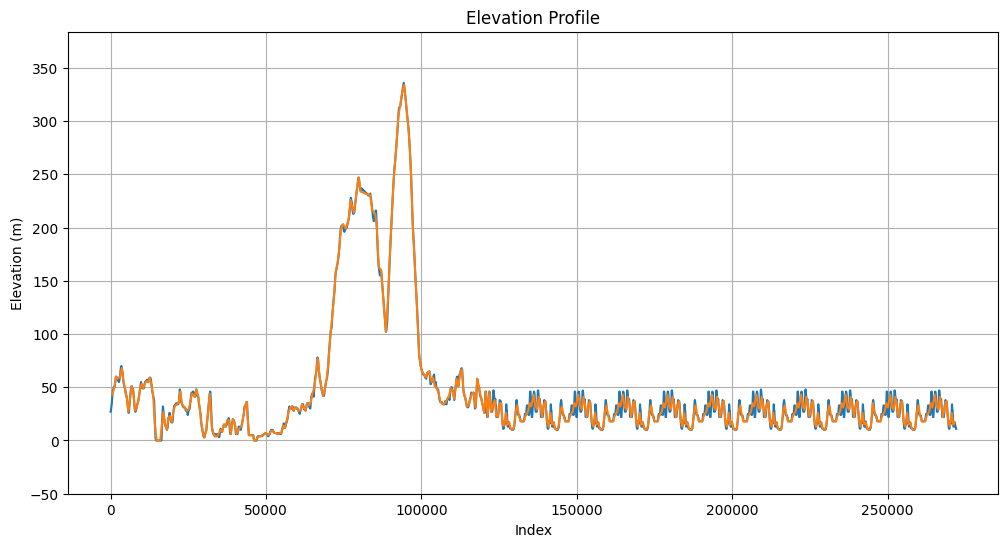

In [34]:
import matplotlib.pyplot as plt


# Plotting the profile
plt.figure(figsize=(12, 6))
plt.plot(raw_points['dist'], raw_points['elev'], label='Initial Data')
plt.plot(processed_points['dist'], processed_points['elev'], label='New Data')
plt.xlabel('Index')
plt.ylabel('Elevation (m)')
plt.title('Elevation Profile')
# Set the y-axis limits
plt.ylim(processed_points['elev'].min()-50, processed_points['elev'].max()+50)
plt.grid(True)

plt.show()

In [40]:

m = folium.Map(location=[raw_points['lat'].iloc[0], raw_points['lon'].iloc[0]], zoom_start=9)

folium.PolyLine(locations=list(zip(raw_points['lat'], raw_points['lon'])), color='blue', weight=2.5, opacity=1).add_to(m)
m

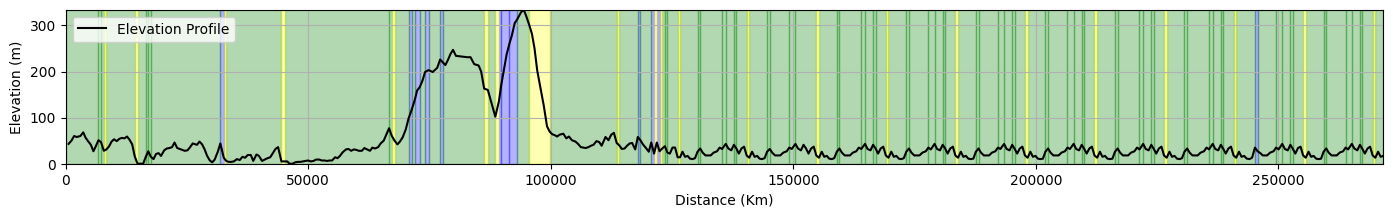

In [36]:
# Convert to DataFrame
stage_df = pd.DataFrame(stage_data['points'])
features_df = pd.DataFrame(stage_data['features'])

# Define color mapping for types
type_colors = {
    'Hills Flat ND': 'blue',
    'Hills Flat': 'blue',
    'Hills ND': 'blue',
    'Hills': 'blue',
    'Climb': 'red',
    'Flat': 'green',
    'Flat Hills': 'green',
    'Flat Hills ND': 'green',
    'Downhill': 'yellow'
}

# Plot the profile chart
plt.figure(figsize=(17, 2))

# Plot elevation profile line
plt.plot(stage_df['dist'], stage_df['elev'], label='Elevation Profile', color='black')

# Plot filled area with colors based on 'type'
for t in type_colors:
    for index, row in features_df[features_df['type'] == t].iterrows():
        plt.fill_betweenx([0, max(stage_df['elev'])], row['start_km'], row['end_km'], color=type_colors[t], alpha=0.3)

# Set the y-axis limits
plt.xlim(0, np.max(stage_df['dist']))
plt.ylim(np.min(stage_df['elev']), np.max(stage_df['elev']))

# Labels and legend
plt.xlabel('Distance (Km)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
stage_data['abilities']

{'Stamina': 100.0,
 'Sprint': 0.0,
 'Climbing': 0.0,
 'Flat': 0.0,
 'Technique': 0.0,
 'Downhill': 0.0,
 'Hills': 0.0,
 'Aggressiveness': 0.0,
 'Teamwork': 0.0}

In [38]:
stage_df

,lat,lon,elev,delta_dist,dist,gradient,max_gradient,min_gradient,feature_type
0,55.95633,-3.24009,43.0,599.112356,599.112356,2.670618,3.369988,0.000000,
1,55.95728,-3.24910,50.0,596.533123,1195.645479,1.173447,1.651642,0.000000,
2,55.96010,-3.25619,60.0,541.942425,1737.587904,1.845214,3.824743,0.000000,
3,55.96177,-3.26443,58.0,551.490243,2289.078147,-0.362654,0.000000,-3.117275,
4,55.96262,-3.27624,60.0,744.112411,3033.190558,0.268777,3.822010,-3.163258,
...,...,...,...,...,...,...,...,...,...
474,55.85932,-4.24102,18.0,531.904197,269438.667571,-3.572072,0.000000,-3.265157,
475,55.85926,-4.24296,13.0,544.480201,269983.147772,-0.918307,0.000000,-3.967835,
476,55.86237,-4.24497,26.0,577.447539,270560.595311,2.251287,5.030854,-2.144055,
477,55.86156,-4.25000,15.0,520.081914,271080.677226,-2.115051,0.000000,-7.019881,


In [39]:
features_df.type.unique()

array(['Flat', 'Flat Hills', 'Downhill', 'Flat Hills ND', 'Hills Flat ND',
       'Hills ND', 'Sprint'], dtype=object)

In [44]:
terrains_df = pd.read_csv('Porcentajes.csv')
terrains_df

,Type,Stamina,Sprint,Climbing,Flat,Cobblestone,Technique,Downhill,Hills,Aggressivenness,Time Trial,Teamwork,Total,Total menos resis
0,Flat,"0,07",0,0,"0,6",0,"0,1",0,0,"0,08",0,"0,15",1,"0,93"
1,Sprint,"0,03","0,7",0,0,0,"0,1",0,0,"0,11",0,"0,06",1,"0,97"
2,Flat Hills,"0,11",0,0,"0,34",0,"0,09","0,06","0,21","0,09",0,"0,1",1,"0,89"
3,Flat Hills ND,"0,13",0,0,"0,37",0,"0,05",0,"0,24","0,1",0,"0,11",1,"0,87"
4,Hills Flat,"0,13",0,0,"0,14",0,"0,08","0,1","0,38","0,1",0,"0,07",1,"0,87"
5,Hills Flat ND,"0,16",0,0,"0,17",0,"0,04",0,"0,42","0,12",0,"0,09",1,"0,84"
6,Hills,"0,16",0,0,0,0,"0,06","0,13","0,51","0,11",0,"0,03",1,"0,84"
7,Hills ND,"0,2",0,0,0,0,"0,04",0,"0,6","0,12",0,"0,04",1,"0,8"
8,Flat Cobblestone,"0,14",0,0,"0,25","0,42","0,11",0,0,"0,04",0,"0,04",1,"0,86"
9,Flat Hills Cobblestone,"0,14",0,0,"0,15","0,37","0,1","0,05","0,11","0,05",0,"0,03",1,"0,86"
